In [1]:
import Calibration as cal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd

In [2]:
path = r"../data"
sensor_type = "Calibration"

## Run the Calibration with NIR Compensation

In [3]:
channels = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'clear', 'nir']
nir_comp_all = []
stats_all = []

# Collect nir_comp for each iteration
for sensor_nr in range(1, 5):
    sensor_instance = cal.Calibration(path, sensor_nr, sensor_type)
    if sensor_instance.preprocessing(save_data=False):
        sensor_instance.pls(channels=channels)
        _, nir_comp, _ = sensor_instance.plot_quantum_response(plot=False)
        nir_comp_all.append(nir_comp)
        stats_all.append(sensor_instance._repeatability())

Found matching files:
Calibration.2025.sensor1.csv
Beamsplitter data loaded
Max R2 is reached with 8 PLS components
R2: 0.9253, RMSE: 0.64442571
f1:	29.11024906826017
f2:	16.9939655307408
f3:	12.12624803747697
f4:	9.901982375441948
f5:	9.042761980427278
f6:	7.284044445211508
f7:	6.791485333465561
f8:	5.4651270923709445
clear:	-5.046215405876729
nir:	0.2517810735710138
Coefficients saved to:  ../data/Calibration_coefficients.csv
Found matching files:
Calibration.2025.sensor2.csv
Beamsplitter data loaded
Max R2 is reached with 6 PLS components
R2: 0.6324, RMSE: 1.42986311
f1:	37.29792177789769
f2:	21.262297900993367
f3:	16.97708091868878
f4:	15.273172741787826
f5:	13.322099267749344
f6:	10.722226448569403
f7:	12.603456126506261
f8:	8.685011472704995
clear:	-5.392285634902561
nir:	0.3293555215696629
Coefficients saved to:  ../data/Calibration_coefficients.csv
Found matching files:
Calibration.2025.sensor3.csv
Beamsplitter data loaded
Max R2 is reached with 6 PLS components
R2: 0.9164, RMS

Calculate relative uncertainty of repeatability and Measurement Uncertainty for each wavelength range.

In [4]:
CV_means_390 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "390_399"]
    CV_means_390.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
#print(f"Relative uncertainty of repeatability 390-439 nm, mean: {np.mean(CV_means_390):.3f} %,  std: {np.std(CV_means_390):.3f} %")
uncertainty_390 = np.sqrt(5**2 + np.mean(CV_means_390)**2)
#print(f"Measurement Uncertainty 390-439 nm: {uncertainty_390:.3f} %")

CV_means_400 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "400_439"]
    CV_means_400.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
#print(f"Relative uncertainty of repeatability 400-439 nm, mean: {np.mean(CV_means_400):.3f} %,  std: {np.std(CV_means_400):.3f} %")
uncertainty_400 = np.sqrt(5**2 + np.mean(CV_means_400)**2)
#print(f"Measurement Uncertainty 400-439 nm: {uncertainty_400:.3f} %")

CV_means_440 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "440_700"]
    CV_means_440.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
#print(f"Relative uncertainty of repeatability 440-700 nm, mean: {np.mean(CV_means_440):.3f} %,  std: {np.std(CV_means_440):.3f} %")
uncertainty_440 = np.sqrt(3**2 + np.mean(CV_means_440)**2)
#print(f"Measurement Uncertainty 440-700 nm: {uncertainty_440:.3f} %")

CV_means_701 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "701_1100"]
    CV_means_701.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
#print(f"Relative uncertainty of repeatability 701-1100 nm, mean: {np.mean(CV_means_701):.3f} %,  std: {np.std(CV_means_701):.3f} %")
uncertainty_701 = np.sqrt(3**2 + np.mean(CV_means_701)**2)
#print(f"Measurement Uncertainty 701-1100 nm: {uncertainty_701:.3f} %")

In [5]:
# Prepare rows
rows = [
    ("390–439", np.mean(CV_means_390), np.std(CV_means_390), uncertainty_390),
    ("400–439", np.mean(CV_means_400), np.std(CV_means_400), uncertainty_400),
    ("440–700", np.mean(CV_means_440), np.std(CV_means_440), uncertainty_440),
    ("701–1100", np.mean(CV_means_701), np.std(CV_means_701), uncertainty_701),
]

# Print header
print(f"{'Wavelength Range (nm)':<20} {'Repeatability (%)':<25} {'Measurement Uncertainty (%)':<30}")
print("-" * 75)

# Print rows
for wl_range, mean_val, std_val, uncertainty in rows:
    repeatability_str = f"{mean_val:.3f} ± {std_val:.3f}"
    print(f"{wl_range:<20} {repeatability_str:<25} {uncertainty:.3f}")


Wavelength Range (nm) Repeatability (%)         Measurement Uncertainty (%)   
---------------------------------------------------------------------------
390–439              1.253 ± 0.460             5.155
400–439              0.232 ± 0.015             5.005
440–700              0.102 ± 0.018             3.002
701–1100             3.182 ± 1.185             4.373


## Run Calibration only with visible channels f1 to f8

In [6]:
channels = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
wl_all = []
vis_all = []
PAR_all= []

for sensor_nr in range(1, 5):
    sensor_instance = cal.Calibration(path, sensor_nr, sensor_type)
    if sensor_instance.preprocessing(save_data=False):
        sensor_instance.pls(channels=channels, save_coef=False)
        wl, vis, PAR = sensor_instance.plot_quantum_response(plot = False)
        wl_all.append(wl)
        vis_all.append(vis)
        PAR_all.append(PAR)

Found matching files:
Calibration.2025.sensor1.csv
Beamsplitter data loaded
Max R2 is reached with 1 PLS components
R2: -0.2665, RMSE: 2.65401539
f1:	3.916067941105744
f2:	4.540775002901742
f3:	6.356520650544656
f4:	5.873454815490502
f5:	6.383070512231889
f6:	5.844187486673903
f7:	6.362705404583997
f8:	3.743926169582209
Found matching files:
Calibration.2025.sensor2.csv
Beamsplitter data loaded
Max R2 is reached with 2 PLS components
R2: 0.1384, RMSE: 2.18907517
f1:	34.76135055662475
f2:	21.097057003082806
f3:	17.6546564469306
f4:	14.543893167607466
f5:	12.222659060268843
f6:	9.179365731090385
f7:	11.40553352868044
f8:	7.269065632125866
Found matching files:
Calibration.2025.sensor3.csv
Beamsplitter data loaded
Max R2 is reached with 2 PLS components
R2: 0.4110, RMSE: 1.80999872
f1:	34.41021092523726
f2:	20.958324387248293
f3:	17.75947146365735
f4:	14.051088434517794
f5:	12.031352471124395
f6:	9.757737774463381
f7:	11.306200006677942
f8:	8.138532306097833
Found matching files:
Calibrat

In [7]:
r2_all = []
for i, sensor in enumerate(nir_comp_all):
    r2 = r2_score(PAR, nir_comp_all[i])
    r2_all.append(r2)
    print(f"r2: {i+1}: {r2:.3f}")
print("-")
r2_all_vis = []
for i, sensor in enumerate(vis_all):
    r2 = r2_score(PAR, vis_all[i])
    r2_all_vis.append(r2)
    print(f"r2 vis: {i+1}: {r2:.3f}")
print("-")
print(f"R2 mean: {np.mean(r2_all)*100:.3f}")
print(f"R2 std: {np.std(r2_all)*100:.3f}")
print(f"relative uncertainty: {np.std(r2_all)/np.mean(r2_all)*100:.3f} %")
print("-")
print(f"R2 mean vis: {np.mean(r2_all_vis)*100:.3f}")
print(f"R2 std vis: {np.std(r2_all_vis)*100:.3f}")
print(f"relative uncertainty vis: {np.std(r2_all_vis)/np.mean(r2_all_vis)*100:.3f} %")

r2: 1: 0.936
r2: 2: 0.944
r2: 3: 0.954
r2: 4: 0.958
-
r2 vis: 1: 0.745
r2 vis: 2: 0.810
r2 vis: 3: 0.799
r2 vis: 4: 0.841
-
R2 mean: 94.788
R2 std: 0.859
relative uncertainty: 0.906 %
-
R2 mean vis: 79.858
R2 std vis: 3.448
relative uncertainty vis: 4.318 %


Coefficient of Variation NIR Comp: 30.364
Mean NIR Comp: 0.457
Std NIR Comp: 0.025
R2 vis: 0.855
R2 nir: 0.953


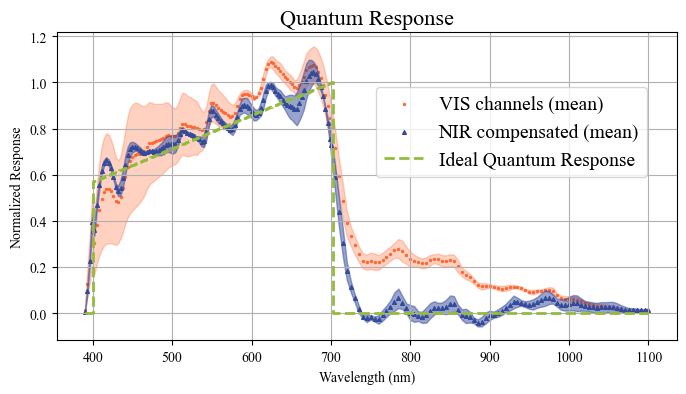

In [8]:
plt.figure(figsize=[8,4])

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"


#plt.scatter(wl, vis, label='VIS channels', color='#ff6733', marker='o', s=1)

mean_vis = np.mean(vis_all, axis=0)
std_vis = np.std(vis_all, axis=0)
coef_of_variation_vis = std_vis / mean_vis * 100
#print(f"Coefficient of Variation VIS: {coef_of_variation_vis.mean():.3f}")
#print(f"Mean VIS: {mean_vis.mean():.3f}")
#print(f"Std VIS: {std_vis.mean():.3f}")
plt.scatter(wl, mean_vis, label='VIS channels (mean)', color='#ff6733', marker='o', s=2)
plt.fill_between(wl, mean_vis - std_vis, mean_vis + std_vis, color='#ff6733', alpha=0.3)

mean_nir_comp = np.mean(nir_comp_all, axis=0)
std_nir_comp = np.std(nir_comp_all, axis=0)
coef_of_variation_nir_comp = std_nir_comp / mean_nir_comp * 100
print(f"Coefficient of Variation NIR Comp: {coef_of_variation_nir_comp.mean():.3f}")
print(f"Mean NIR Comp: {mean_nir_comp.mean():.3f}")
print(f"Std NIR Comp: {std_nir_comp.mean():.3f}")
plt.scatter(wl, mean_nir_comp, label='NIR compensated (mean)', color='#344a9a', marker='^', s=7)
plt.fill_between(wl, mean_nir_comp - std_nir_comp, mean_nir_comp + std_nir_comp, color='#344a9a', alpha=0.5)

#plt.scatter(wl, nir_comp, label='NIR compensated', color='#344a9a', s=3, marker='o')
plt.step(wl, PAR, linestyle='--', label=f'Ideal Quantum Response', color="#93bc3c", linewidth=2, where='mid')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

print(f"R2 vis: {r2_score(PAR, mean_vis):.3f}")
print(f"R2 nir: {r2_score(PAR, mean_nir_comp):.3f}")

plt.grid()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Response')
#plt.text(820, 0.23, f"R2: {r2_score(PAR, nir_comp):.3f}", fontsize = 14)
# Remove rows with NaN values in 'PAR' or 'PAR_calculated'
plt.title(f'Quantum Response')
#plt.title(f'{self.sensor_type} Sensor {self.sensor_number} Quantum Response')
plt.legend(loc = "lower left", bbox_to_anchor=(0.5,0.5), fontsize = 14)
